### Importing and Exploring Data

In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualisation
import seaborn as sns  # For enhanced data visualisation
from sklearn.preprocessing import StandardScaler  # For standardising features
from sklearn.cluster import KMeans  # For K-Means clustering

# Setting the Seaborn style for plots
sns.set()

In [2]:
# Reading the CSV file "Online retail.csv" into a DataFrame
# The encoding 'ISO-8859-1' is specified to handle special characters in the data
df = pd.read_csv("Online retail.csv", encoding='ISO-8859-1')

# Displaying the first five and last five rows of the DataFrame to ensure it has been loaded correctly
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [3]:
# Displaying the shape of the DataFrame which displays rows and columns as a tuple
df.shape

(541909, 8)

In [4]:
# Displaying DataFrame summary
df.info()

# Counting missing values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Data Cleaning

In [5]:
# Dropping rows where 'CustomerID' is missing
df = df.dropna(subset=['CustomerID'])

In [6]:
# Counting remaining missing values in each column after dropping rows with missing 'CustomerID'
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
# Dropping duplicate rows
df = df.drop_duplicates()

# Displaying DataFrame summary after dropping duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [8]:
# Counting the number of rows where 'UnitPrice' is negative
negative_unit_price = df['UnitPrice'] < 0
negative_unit_price.sum()

0

In [9]:
# Counting the number of rows where 'Quantity' is negative
negative_quantity = df['Quantity'] < 0
negative_quantity.sum()

8872

In [10]:
# Filtering out rows where 'Quantity' is greater than 0
df = df[df['Quantity'] > 0]

In [11]:
# Counting the number of rows where 'Quantity' is negative after filtering
negative_quantity = df['Quantity'] < 0
negative_quantity.sum()

0

In [12]:
# Displaying the shape of the DataFrame after filtering
df.shape

(392732, 8)

In [13]:
# Converting 'InvoiceDate' column to datetime format, considering day-first format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

# Displaying the 'InvoiceDate' column after conversion
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392732, dtype: datetime64[ns]

In [14]:
# Calculating the total amount for each transaction by multiplying 'Quantity' and 'UnitPrice'
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Displaying the DataFrame after adding the 'TotalAmount' column
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [15]:
# Creating a copy of the DataFrame
df_copy = df.copy()

In [16]:
# Calculating the reference date as the maximum date in the 'InvoiceDate' column plus one day
reference_date = df_copy['InvoiceDate'].max() + pd.Timedelta(days=1)

# Displaying the reference date
reference_date

Timestamp('2011-12-10 12:50:00')

In [17]:
# Calculating RFM (Recency, Frequency, Monetary) metrics for each customer
rfm = df_copy.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency: Days since last purchase
    'InvoiceNo': 'count',  # Frequency: Number of purchases
    'TotalAmount': 'sum'  # Monetary: Total amount spent
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'})

# Displaying the RFM metrics DataFrame
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [18]:
# Calculating the average purchase value for each customer
rfm['AveragePurchaseValue'] = rfm['Monetary'] / rfm['Frequency']

# Displaying the RFM metrics DataFrame with the new column
rfm

,Recency,Frequency,Monetary,AveragePurchaseValue
CustomerID,,,,
12346.0,326,1,77183.60,77183.600000
12347.0,2,182,4310.00,23.681319
12348.0,75,31,1797.24,57.975484
12349.0,19,73,1757.55,24.076027
12350.0,310,17,334.40,19.670588
...,...,...,...,...
18280.0,278,10,180.60,18.060000
18281.0,181,7,80.82,11.545714
18282.0,8,12,178.05,14.837500


In [19]:
# Extracting the year, month, day, day of the week, and hour from 'InvoiceDate' and creating new columns
df_copy['InvoiceYear'] = df_copy['InvoiceDate'].dt.year
df_copy['InvoiceMonth'] = df_copy['InvoiceDate'].dt.month
df_copy['InvoiceDay'] = df_copy['InvoiceDate'].dt.day
df_copy['InvoiceDayOfWeek'] = df_copy['InvoiceDate'].dt.dayofweek
df_copy['InvoiceHour'] = df_copy['InvoiceDate'].dt.hour

# Displaying the DataFrame with new columns
df_copy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDayOfWeek,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,4,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,4,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,4,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,4,12


In [20]:
# Calculating customer features based on their purchase history
customer_features = df_copy.groupby('CustomerID').agg({
    'InvoiceDate': ['min', 'max', 'nunique'],  # First purchase date, last purchase date, and number of unique purchases
    'TotalAmount': ['sum', 'mean']  # Total spent and average spent per purchase
}).reset_index()

# Renaming columns for clarity
customer_features.columns = ['CustomerID', 'FirstPurchaseDate', 'LastPurchaseDate', 'UniquePurchases', 'TotalSpent', 'AverageSpent']

# Displaying the customer features DataFrame
customer_features

,CustomerID,FirstPurchaseDate,LastPurchaseDate,UniquePurchases,TotalSpent,AverageSpent
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,1,77183.60,77183.600000
1,12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,7,4310.00,23.681319
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,4,1797.24,57.975484
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,1,1757.55,24.076027
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,1,334.40,19.670588
...,...,...,...,...,...,...
4334,18280.0,2011-03-07 09:52:00,2011-03-07 09:52:00,1,180.60,18.060000
4335,18281.0,2011-06-12 10:53:00,2011-06-12 10:53:00,1,80.82,11.545714
4336,18282.0,2011-08-05 13:35:00,2011-12-02 11:43:00,2,178.05,14.837500
4337,18283.0,2011-01-06 14:14:00,2011-12-06 12:02:00,16,2045.53,2.837074


### Sales Trends

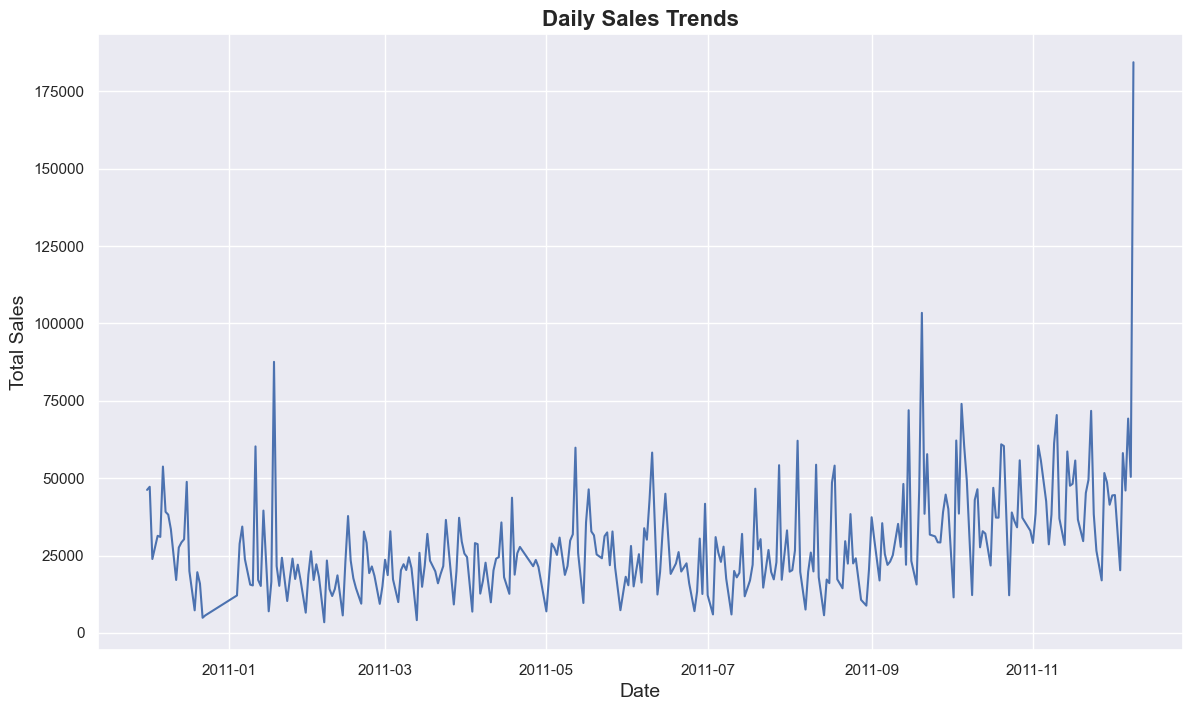

In [21]:
# Calculating daily sales by grouping by date and summing the 'TotalAmount'
daily_sales = df_copy.groupby(df_copy['InvoiceDate'].dt.date)['TotalAmount'].sum()

# Plotting the daily sales trends
plt.figure(figsize=(14, 8))
daily_sales.plot()
plt.title('Daily Sales Trends', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

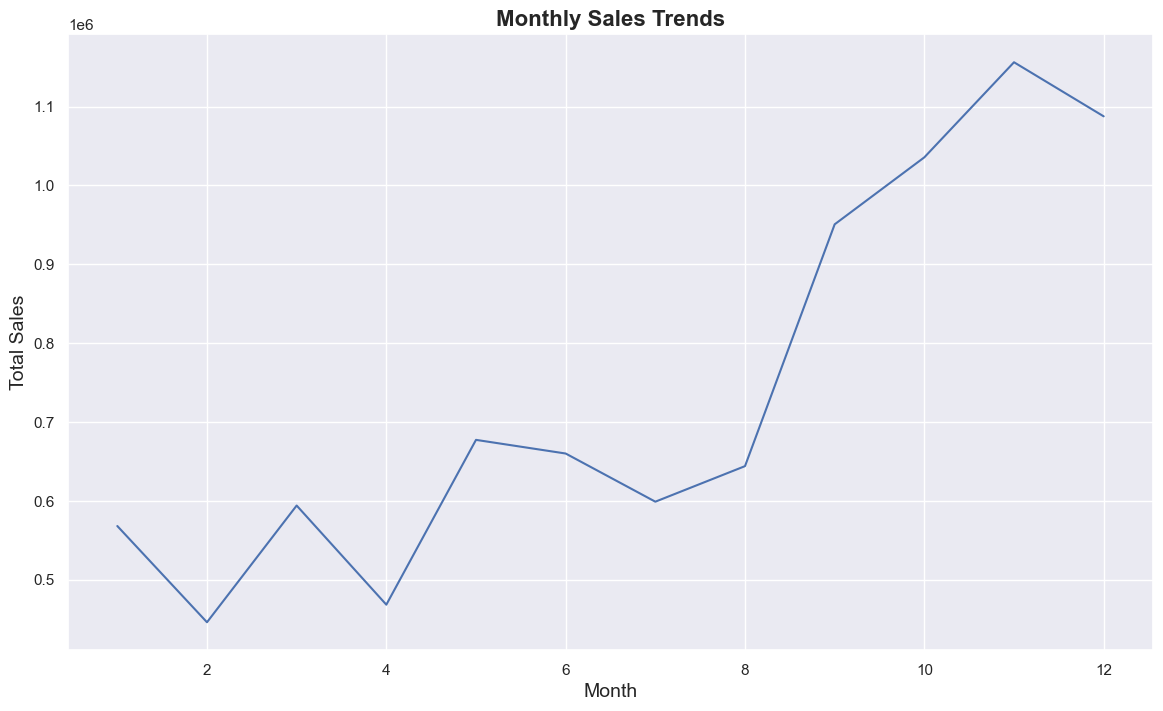

In [22]:
# Calculating monthly sales by grouping by month and summing the 'TotalAmount'
monthly_sales = df.groupby(df['InvoiceDate'].dt.month)['TotalAmount'].sum()

# Plotting the monthly sales trends
plt.figure(figsize=(14, 8))
monthly_sales.plot()
plt.title('Monthly Sales Trends', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

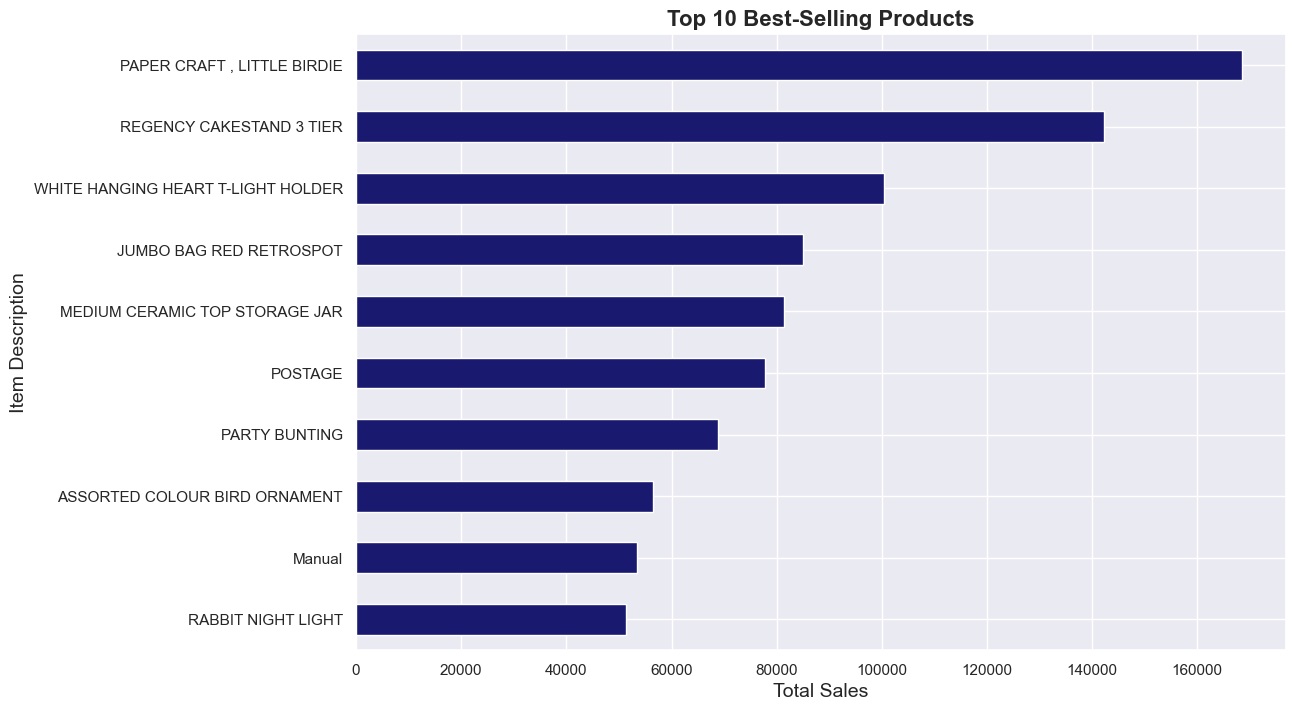

In [23]:
# Calculating the total sales for each product and selecting the top 10 best-selling products
top_products = df_copy.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 best-selling products
plt.figure(figsize=(12, 8))
top_products.plot(kind='barh', color='midnightblue')
plt.title('Top 10 Best-Selling Products', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Item Description', fontsize=14)
plt.gca().invert_yaxis()  # Inverting y-axis to display the highest sales at the top
plt.show()

### Customer Segmentation 

In [24]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Standardising the RFM metrics
rfm_scaled = scaler.fit_transform(rfm)

In [25]:
# Creating a KMeans object with specified number of clusters and number of initialisations
kmeans = KMeans(n_clusters=3, n_init='auto')

# Performing KMeans clustering on the standardised RFM metrics
clusters = kmeans.fit_predict(rfm_scaled)

# Adding the cluster labels to the original RFM DataFrame
rfm['Clusters'] = clusters

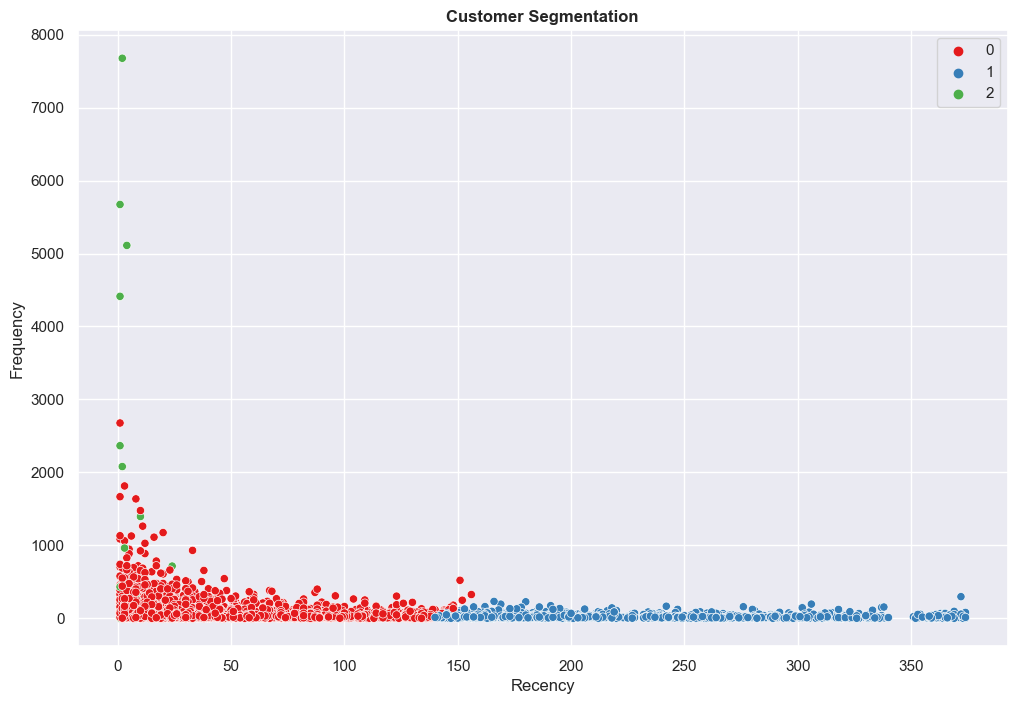

In [27]:
# Plotting the scatterplot for customer segmentation based on Recency and Frequency, coloured by clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Frequency', hue=clusters, data=rfm, palette='Set1')
plt.title('Customer Segmentation', fontweight='bold')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

### Using SQL

In [32]:
# Displaying the first few rows of the original DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [33]:
# Importing the sqlite3 library for SQLite database operations
import sqlite3

# Connecting to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Writing the DataFrame 'df' into an SQLite table named "Online_Retail" in the in-memory database
df.to_sql("Online_Retail", conn, index=False)

392732

In [43]:
# Setting the display format for floating-point numbers to show two decimal places
pd.options.display.float_format = '{:.2f}'.format

# Executing an SQL query to calculate the total revenue by country from the "Online_Retail" table and store the results in the DataFrame 'revenue_by_country'
revenue_by_country = pd.read_sql("""
    SELECT Country, SUM(Quantity * UnitPrice) AS TotalRevenue
    FROM Online_Retail
    GROUP BY Country
    ORDER BY TotalRevenue DESC
""", conn)

# Printing the DataFrame 'revenue_by_country' to display the total revenue by country
print(revenue_by_country)

                 Country  TotalRevenue
0         United Kingdom    7285024.64
1            Netherlands     285446.34
2                   EIRE     265262.46
3                Germany     228678.40
4                 France     208934.31
5              Australia     138453.81
6                  Spain      61558.56
7            Switzerland      56443.95
8                Belgium      41196.34
9                 Sweden      38367.83
10                 Japan      37416.37
11                Norway      36165.44
12              Portugal      33375.84
13               Finland      22546.08
14             Singapore      21279.29
15       Channel Islands      20440.54
16               Denmark      18955.34
17                 Italy      17483.24
18                Cyprus      13502.85
19               Austria      10198.68
20                Poland       7334.65
21                Israel       7215.84
22                Greece       4760.52
23               Iceland       4310.00
24                Canada 

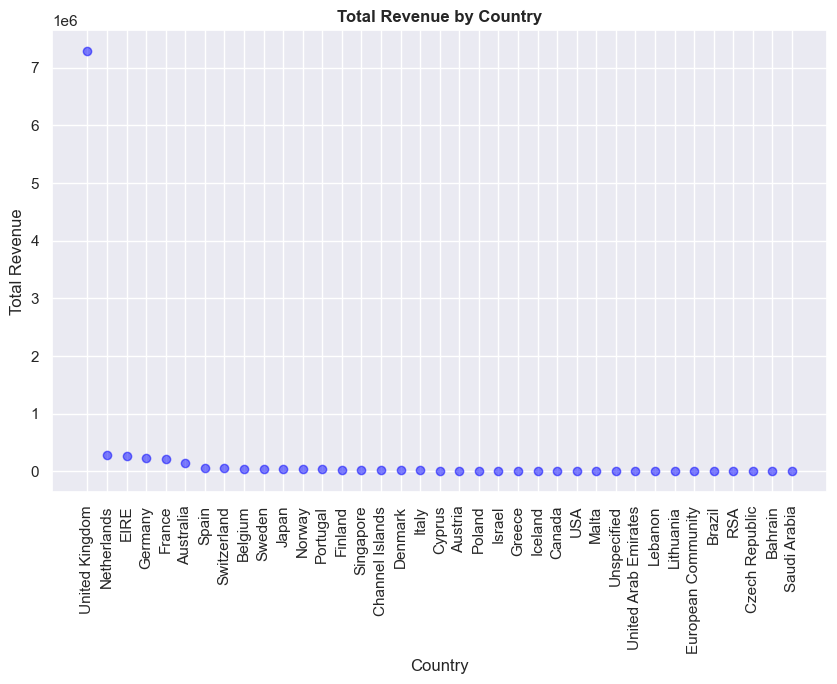

In [45]:
# Setting the figure size for the scatter plot
plt.figure(figsize=(10, 6))

# Creating a scatter plot with 'Country' on the x-axis and 'TotalRevenue' on the y-axis
plt.scatter(revenue_by_country["Country"], revenue_by_country["TotalRevenue"], color='blue', alpha=0.5)

# Setting the label for the x-axis
plt.xlabel("Country")

# Rotating the x-axis labels to improve readability
plt.xticks(rotation=90)

# Setting the label for the y-axis
plt.ylabel("Total Revenue")

# Setting the title of the plot with bold fontweight
plt.title("Total Revenue by Country", fontweight='bold')

# Enabling gridlines on the plot
plt.grid(True)

# Displaying the plot
plt.show()